<a href="https://colab.research.google.com/github/ausfear/Python/blob/main/Machine%20Learning%20Projects/Kelas%20Pengembangan%20ML/PengembanganML_8_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/imdb_indonesian_movies_2.csv')
df.head()

,judul_film,ringkasan_sinopsis,genre
0,Sunan Kalijaga,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Gie,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL Movie,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Sang pencerah,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama


In [3]:
df = df.drop(columns=['judul_film'])
df.head()

,ringkasan_sinopsis,genre
0,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama


In [4]:
category = pd.get_dummies(df.genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns=['genre'])
df_baru

,ringkasan_sinopsis,Drama,Horor,Komedi,Laga,Romantis
0,Raden Mas Said putra sulung Tumenggung Wilarik...,1,0,0,0,0
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,1,0,0,0,0
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,1,0,0,0,0
3,POL menceritakan kisah hidup yang luar biasa d...,1,0,0,0,0
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,1,0,0,0,0
...,...,...,...,...,...,...
1000,Winter in Tokyo berpusat pada kehidupan Ishida...,0,0,0,0,1
1001,Markonah melarikan diri ke Jakarta karena akan...,0,0,0,0,1
1002,"Tempat aking lebih dari 36 jam, Last Night ada...",0,0,0,0,1
1003,Proyek baru ini adalah tentang seorang lelaki ...,0,0,0,0,1


In [5]:
sinopsis = df_baru['ringkasan_sinopsis'].values
label = df_baru[['Drama', 'Horor', 'Komedi', 'Laga', 'Romantis']].values

In [6]:
from sklearn.model_selection import train_test_split

sinopsis_train, sinopsis_test, label_train, label_test = train_test_split(sinopsis, label, test_size=0.2)

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_train)
tokenizer.fit_on_texts(sinopsis_test)

sequence_train = tokenizer.texts_to_sequences(sinopsis_train)
sequence_test = tokenizer.texts_to_sequences(sinopsis_test)

padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

In [8]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
num_epochs = 30
history = model.fit(padded_train, label_train, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
26/26 - 30s - loss: 1.6105 - accuracy: 0.1915 - val_loss: 1.6093 - val_accuracy: 0.2488
Epoch 2/30
26/26 - 27s - loss: 1.6075 - accuracy: 0.2102 - val_loss: 1.6099 - val_accuracy: 0.1741
Epoch 3/30
26/26 - 27s - loss: 1.5908 - accuracy: 0.3333 - val_loss: 1.6082 - val_accuracy: 0.2189
Epoch 4/30
26/26 - 27s - loss: 1.4294 - accuracy: 0.4664 - val_loss: 1.6409 - val_accuracy: 0.2090
Epoch 5/30
26/26 - 27s - loss: 1.0029 - accuracy: 0.6032 - val_loss: 1.7086 - val_accuracy: 0.2736
Epoch 6/30
26/26 - 27s - loss: 0.6646 - accuracy: 0.7736 - val_loss: 2.0432 - val_accuracy: 0.3284
Epoch 7/30
26/26 - 27s - loss: 0.4334 - accuracy: 0.8619 - val_loss: 2.4770 - val_accuracy: 0.3284
Epoch 8/30
26/26 - 27s - loss: 0.2093 - accuracy: 0.9353 - val_loss: 2.8372 - val_accuracy: 0.2935
Epoch 9/30
26/26 - 27s - loss: 0.0736 - accuracy: 0.9888 - val_loss: 3.4264 - val_accuracy: 0.2935
Epoch 10/30
26/26 - 27s - loss: 0.0469 - accuracy: 0.9888 - val_loss: 3.7738 - val_accuracy: 0.3184
Epoch 11/

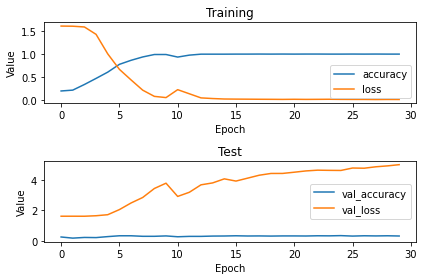

In [11]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Training')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'])

plt.subplot(212)
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Test')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['val_accuracy', 'val_loss'])

plt.tight_layout()
plt.show()